# Data Visualization Assignment (Matplotlib & Seaborn)
Author: Katie Sylvia

Data set in the data folder as `auto_mpg_dataset.csv`. Dataset is of cars from the 1970s and 1980s.<br>
Data from: https://www.mldata.io/datasets-sort/regression/<br>

In [2]:
# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [3]:
# Read in the data
mpg_data = pd.read_csv('auto_mpg_dataset.csv')

In [4]:
# Display the first 5 rows
mpg_data.head(5)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,ford torino,17.0


In [5]:
# Summary statistics (using .describe())
mpg_data.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,5.454774,193.425879,-1404.643216,2970.424623,15.568090,76.010050,1.572864,23.514573
std,1.701004,104.269838,12213.424763,846.841774,2.757689,3.697627,0.802055,7.815984
min,3.000000,68.000000,-100000.000000,1613.000000,8.000000,70.000000,1.000000,9.000000
25%,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000,17.500000
50%,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000,23.000000
75%,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000,29.000000
max,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,46.600000


## Data Cleaning

In [6]:
# Check the datatypes
mpg_data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
mpg             float64
dtype: object

In [7]:
# Check for null values
mpg_data.isnull()


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,mpg
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [8]:
# storing original data (before dropping car names) for additional analysis
org_mpg_data = mpg_data[mpg_data['horsepower']>0]
org_mpg_data = org_mpg_data.sort_values('mpg', ascending=False)

condensed = org_mpg_data.groupby(['car_name','model_year','horsepower']).mean('mpg')[['mpg','cylinders']]

In [9]:
# Drop the non-numerical column
mpg_data.drop(['car_name'], axis=1)


,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
0,8,307.0,130.0,3504.0,12.0,70,1,18.0
1,8,350.0,165.0,3693.0,11.5,70,1,15.0
2,8,318.0,150.0,3436.0,11.0,70,1,18.0
3,8,304.0,150.0,3433.0,12.0,70,1,16.0
4,8,302.0,140.0,3449.0,10.5,70,1,17.0
...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,1,27.0
394,4,97.0,52.0,2130.0,24.6,82,2,44.0
395,4,135.0,84.0,2295.0,11.6,82,1,32.0
396,4,120.0,79.0,2625.0,18.6,82,1,28.0


## Correlations

In [10]:
# Get correlations for numeric data
mpg_data.corr(numeric_only=True)

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,mpg
cylinders,1.000000,0.950721,0.084291,0.896017,-0.505419,-0.348746,-0.562543,-0.775396
displacement,0.950721,1.000000,0.079333,0.932824,-0.543684,-0.370164,-0.609409,-0.804203
horsepower,0.084291,0.079333,1.000000,0.071114,-0.080685,-0.067952,0.035575,-0.073501
weight,0.896017,0.932824,0.071114,1.000000,-0.417457,-0.306564,-0.581024,-0.831741
acceleration,-0.505419,-0.543684,-0.080685,-0.417457,1.000000,0.288137,0.205873,0.420289
model_year,-0.348746,-0.370164,-0.067952,-0.306564,0.288137,1.000000,0.180662,0.579267
origin,-0.562543,-0.609409,0.035575,-0.581024,0.205873,0.180662,1.000000,0.563450
mpg,-0.775396,-0.804203,-0.073501,-0.831741,0.420289,0.579267,0.563450,1.000000


Text(0.5, 1.0, 'Auto MPG Data Heat Map:')

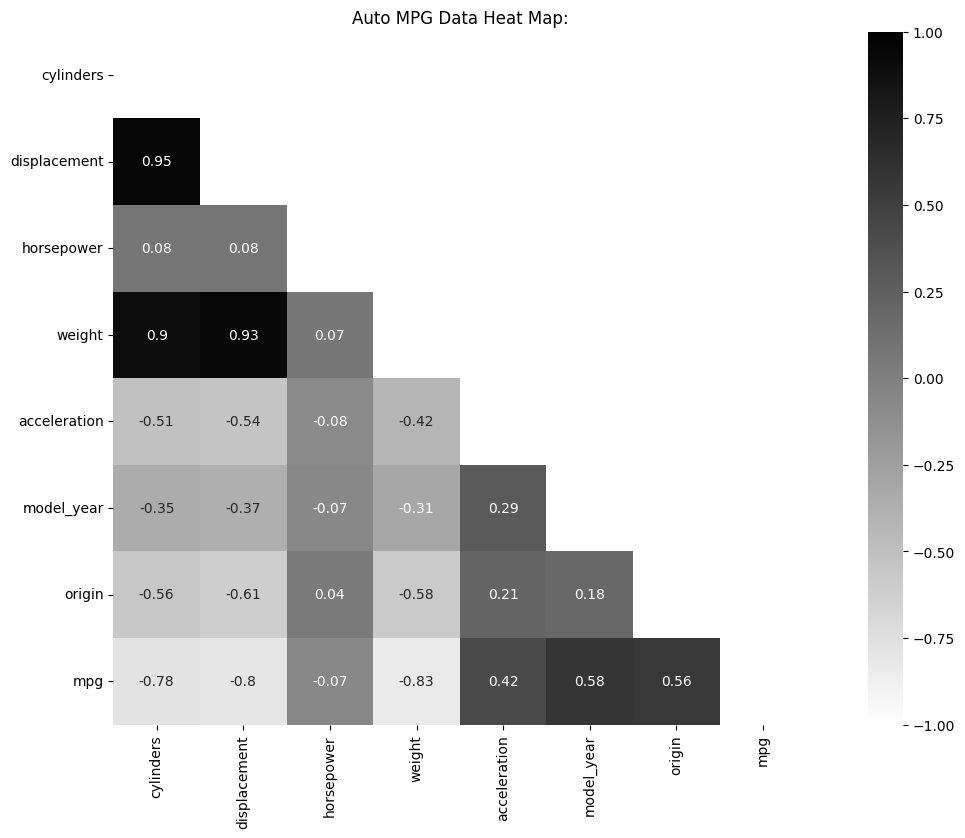

In [11]:
# Create a heatmap
# Establish figure size
plt.figure(figsize=(16,9))

core = mpg_data.corr(numeric_only=True).round(2)
mask = np.zeros_like(core)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(core, 
            square = True,
            cmap="binary",
            annot=True,
            vmax= 1,
            vmin= -1,
            mask=mask,
            )
plt.title('Auto MPG Data Heat Map:')



<Axes: >

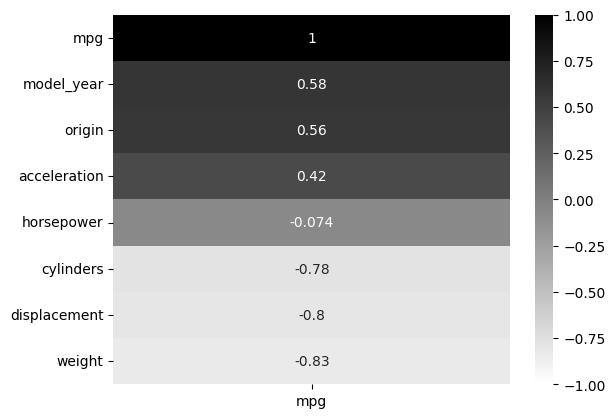

In [12]:
# What if we ONLY wanted to look at how the features correlate with `mpg`?
#sns.heatmap(cereal.corr(numeric_only = True)[['rating']].sort_values(by = 'rating', ascending = False,),annot=True, cmap='coolwarm', vmax=1,vmin=-1);
sns.heatmap(mpg_data.corr(numeric_only=True)[['mpg']].sort_values(by = 'mpg', ascending=False), annot=True, cmap = 'binary', vmax =1, vmin=-1)

For more Seaborn color palettes, click [here](https://seaborn.pydata.org/tutorial/color_palettes.html).

## Countplots

**Distribution of Model Year**

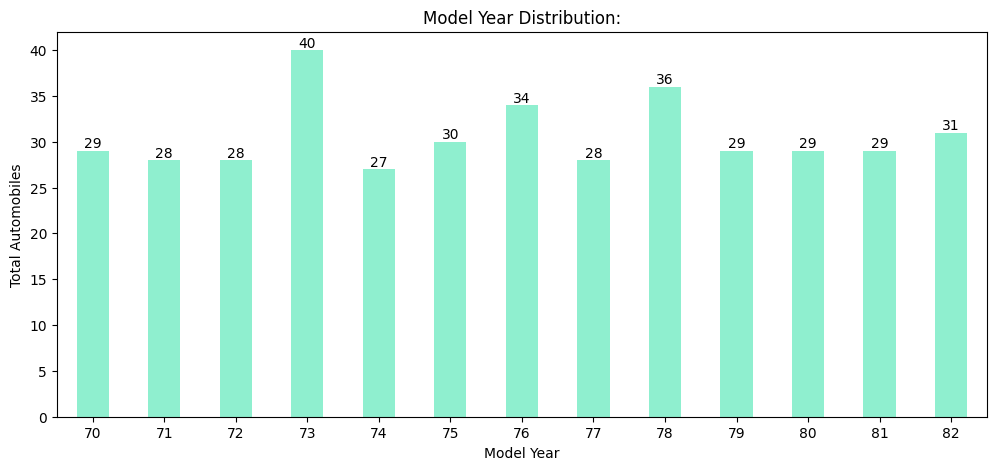

In [13]:
# Setting size of Chart
plt.figure(figsize = (12, 5))
count_plot = sns.countplot(data=mpg_data, x=mpg_data['model_year'], color='aquamarine', width=.45, )
plt.title('Model Year Distribution:')
plt.xlabel('Model Year')
plt.ylabel('Total Automobiles')

# Adding Data Labels to each Bar
for label in count_plot.containers:
    count_plot.bar_label(label)
plt.show()



**Distribution of Origin**

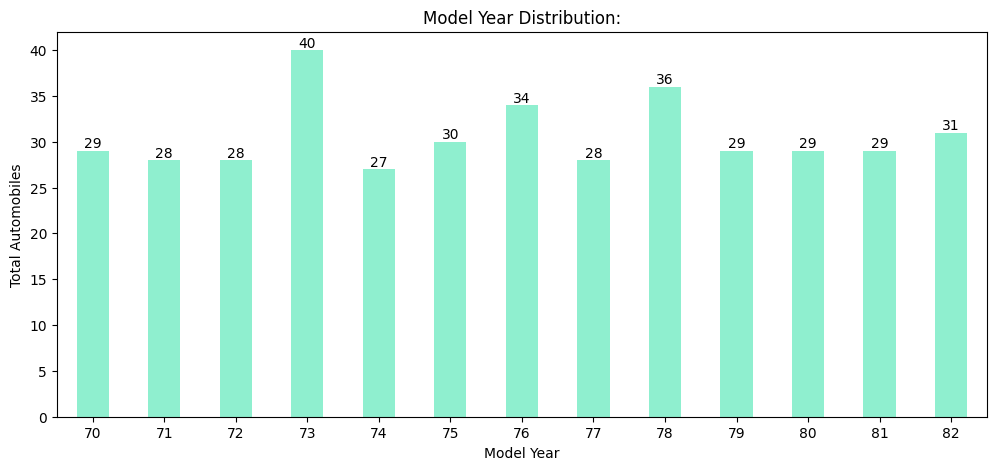

In [14]:
plt.figure(figsize = (12, 5))
count_plot = sns.countplot(data=mpg_data, x=mpg_data['model_year'], color='aquamarine', width=.45, )
plt.title('Model Year Distribution:')
plt.xlabel('Model Year')
plt.ylabel('Total Automobiles')
for label in count_plot.containers:
    count_plot.bar_label(label)
plt.show()


**Distribution of Cylinders**

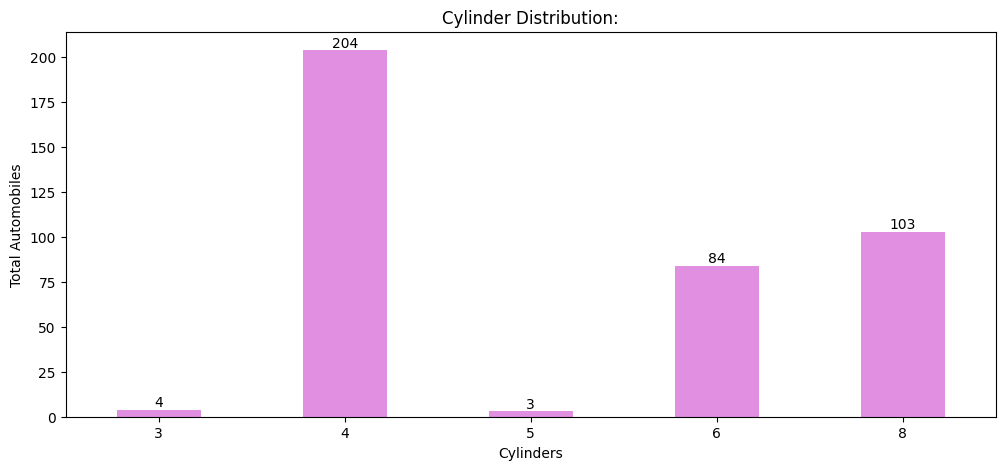

In [15]:
plt.figure(figsize = (12, 5))
count_plot = sns.countplot(data=mpg_data, x=mpg_data['cylinders'], color='violet', width=.45, )
plt.title('Cylinder Distribution:')
plt.xlabel('Cylinders')
plt.ylabel('Total Automobiles')
for label in count_plot.containers:
    count_plot.bar_label(label)
plt.show()


## Boxplots/Histograms

**MPG Distribution**

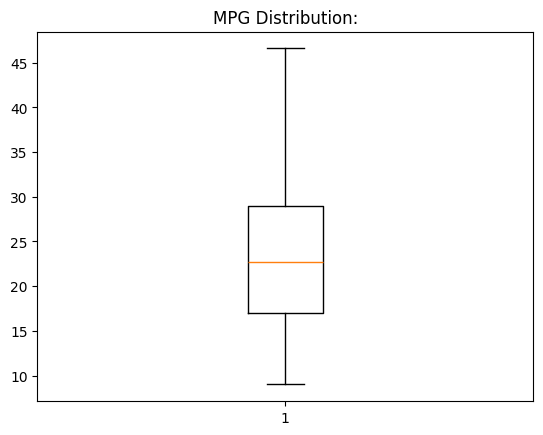

In [16]:
# Plot it
plt.boxplot(org_mpg_data['mpg']
            );
# Create a descriptive title
plt.title('MPG Distribution:');


**Weight Distribution**

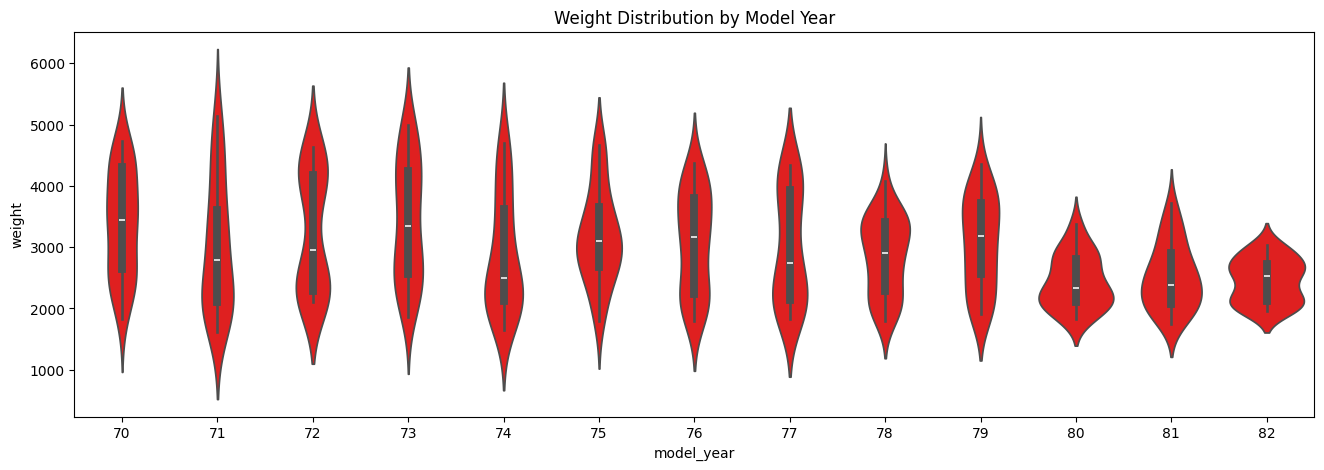

In [17]:
# plt.figure(figsize = (12, 5))
# sns.violinplot(x = mpg_data['weight'])

plt.figure(figsize = (16, 5))
sns.violinplot(y=mpg_data["weight"],x=mpg_data['model_year'],color='red')
plt.title('Weight Distribution by Model Year');

## Scatterplots

**Weight vs. MPG**

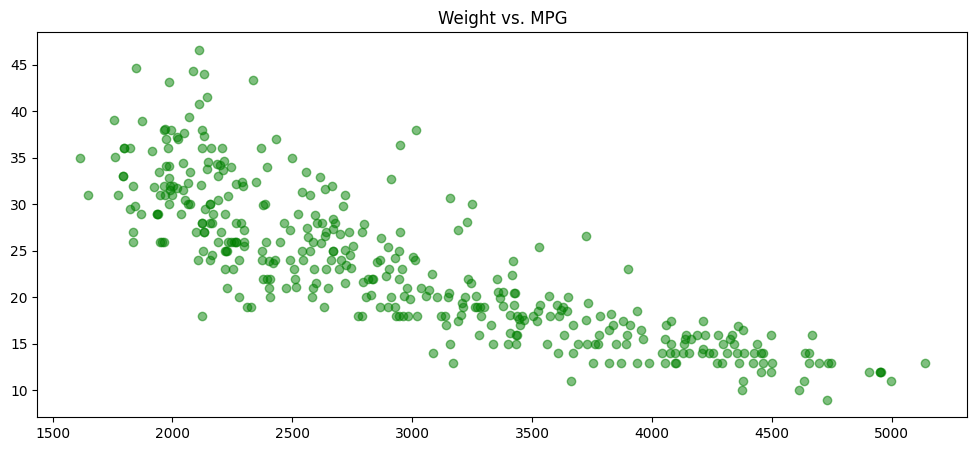

In [18]:
plt.figure(figsize = (12,5))

plt.scatter(x = org_mpg_data['weight'],
            y= org_mpg_data['mpg'],
            alpha = 0.5,
            color = 'green'
            )



plt.title('Weight vs. MPG');



## Your turn!

In [19]:
# Create more plot(s) of your choosing to help you explore the data!

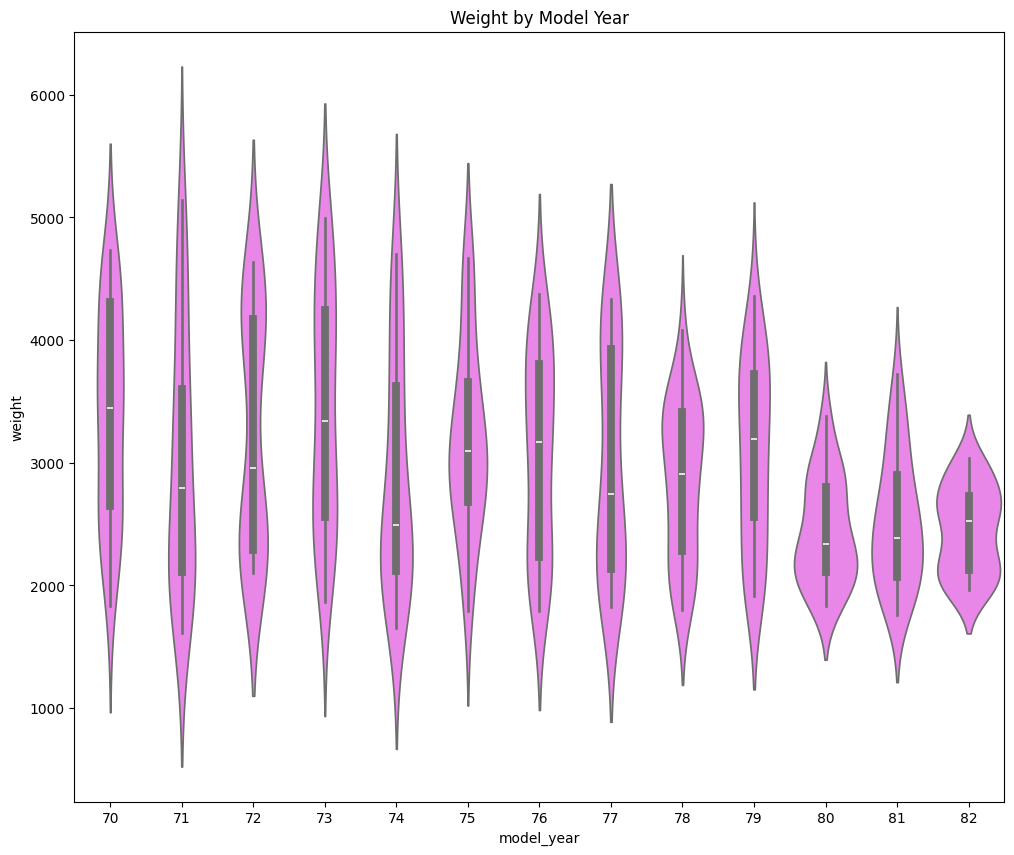

In [20]:
# Testing a violin plot for Weight by Model Year
plt.figure(figsize = (12, 10))
sns.violinplot(y = mpg_data['weight'], x=mpg_data['model_year'],saturation=0.9,width=.9,color='violet',legend=False)
plt.title('Weight by Model Year');

In [21]:
# Verifying the dataframes data types
org_mpg_data.dtypes

cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
mpg             float64
dtype: object

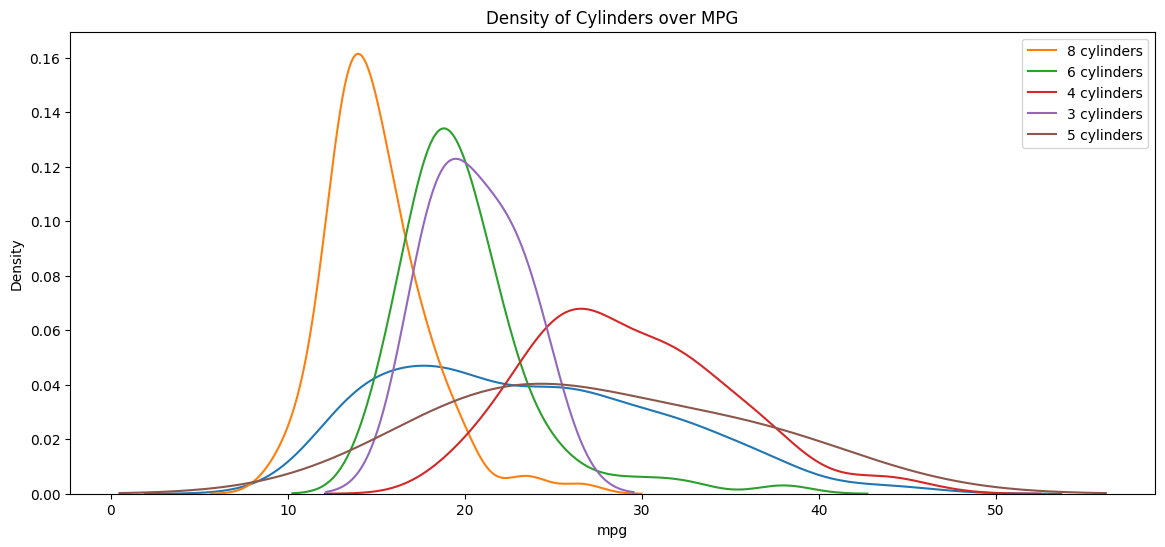

In [22]:
plt.figure(figsize=(14,6))
worst_car_names = org_mpg_data.sort_values('mpg', ascending=True)
sns.kdeplot(data=worst_car_names, x='mpg');
for label in worst_car_names['cylinders'].unique():
    subset = worst_car_names[worst_car_names['cylinders'] == label]
    sns.kdeplot(data=subset, x='mpg', label=f'{label} cylinders')
plt.title('Density of Cylinders over MPG')
plt.legend()
plt.show()

<Figure size 2000x1100 with 0 Axes>

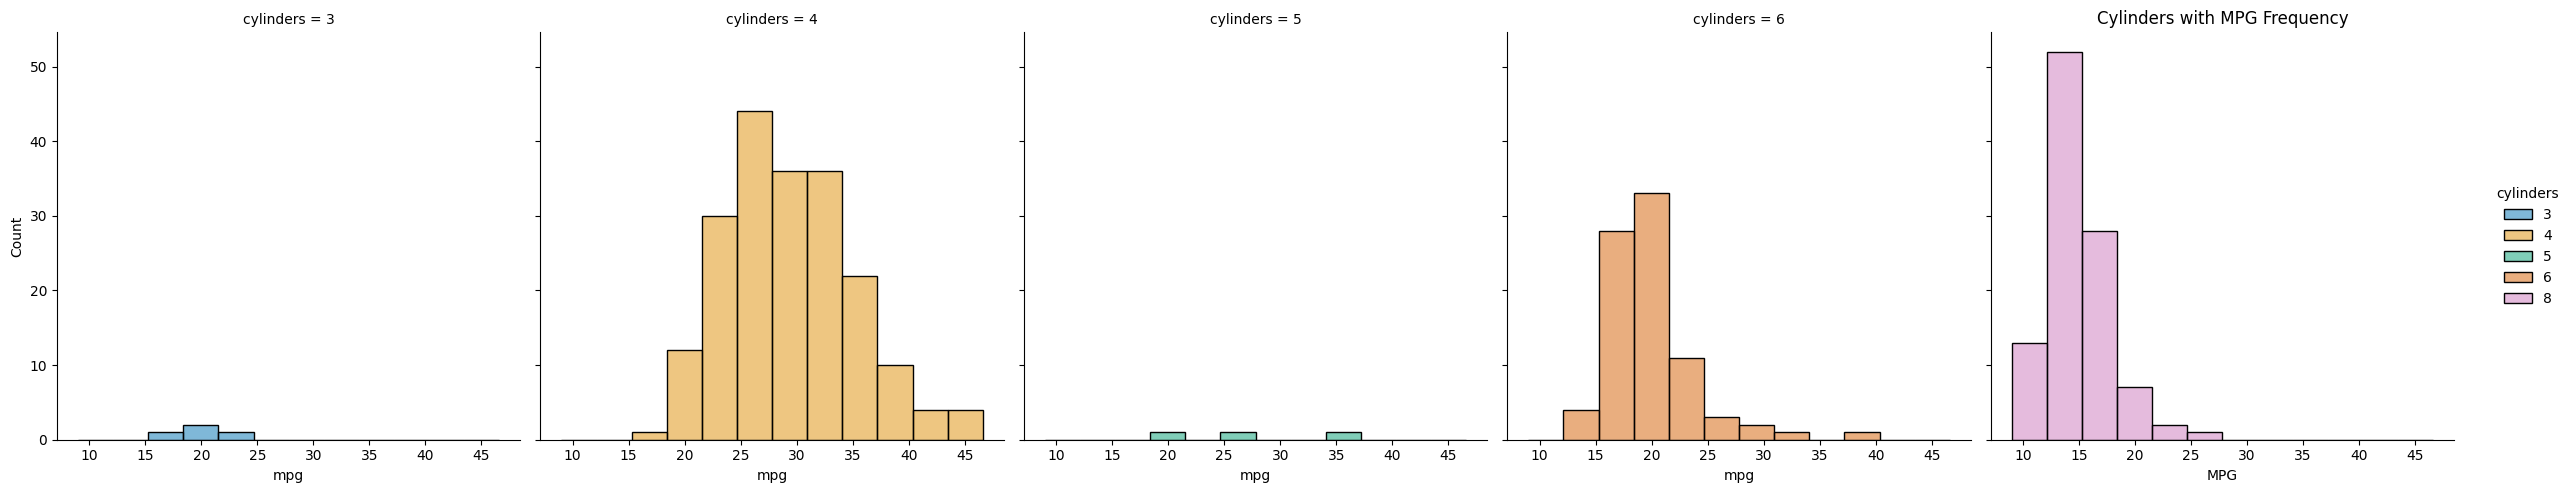

In [23]:
plt.figure(figsize=(20,11));
top_car_names = org_mpg_data.sort_values('mpg', ascending=False);
sns.displot(data=top_car_names, x='mpg',hue='cylinders', col='cylinders',palette='colorblind');
plt.title('Cylinders with MPG Frequency');
plt.ylabel('Frequency');
plt.xlabel('MPG');


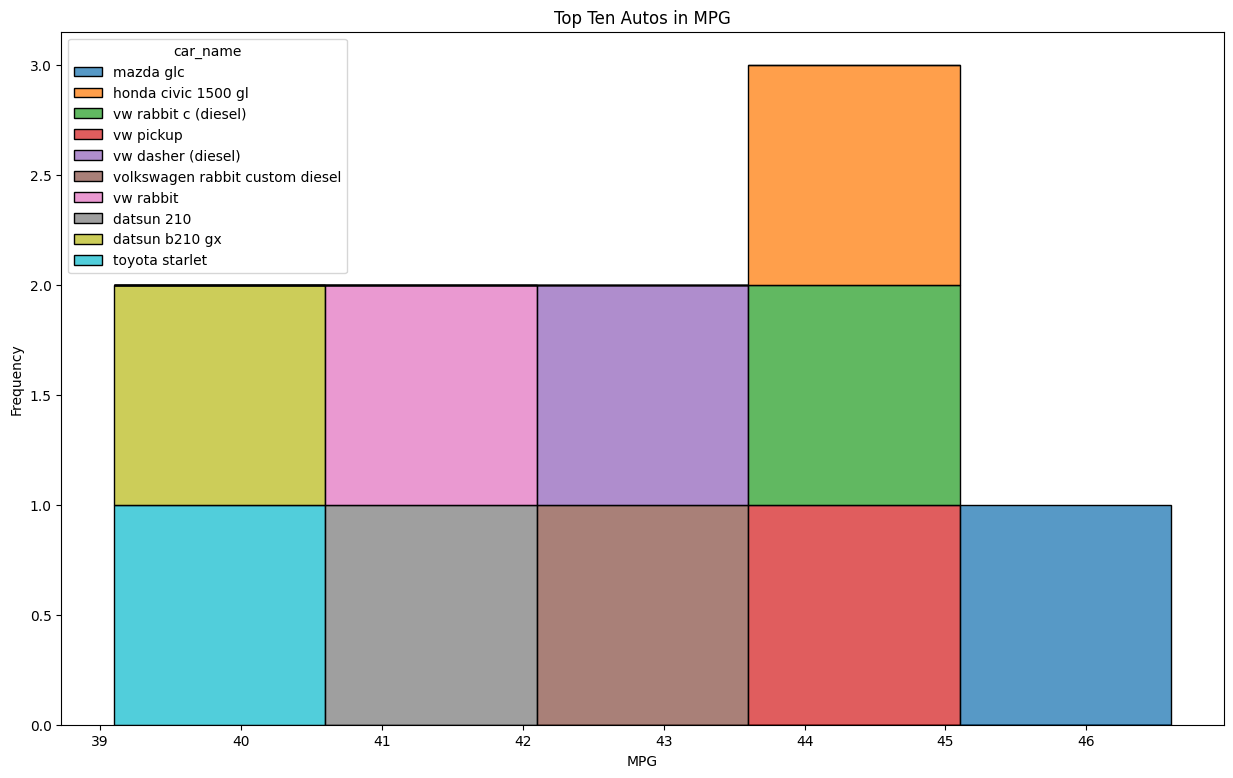

In [24]:
plt.figure(figsize=(15,9))
top_car_names = org_mpg_data.sort_values('mpg', ascending=False).head(10)
sns.histplot(data=top_car_names, x='mpg',multiple='stack',hue='car_name')
plt.title('Top Ten Autos in MPG')
plt.ylabel('Frequency')
plt.xlabel('MPG');


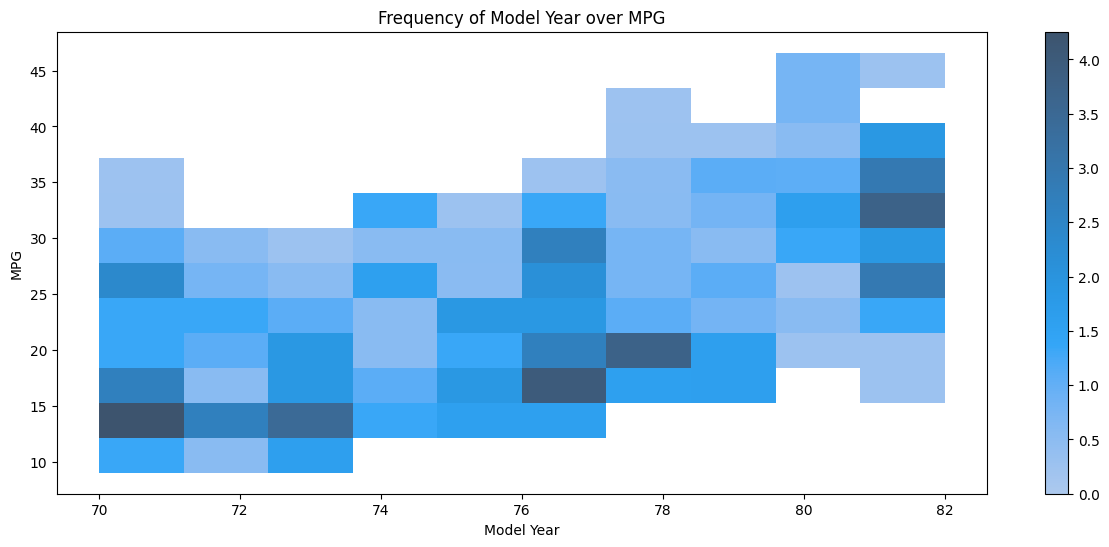

In [25]:
# Frequency of model years showing in mpg rating
plt.figure(figsize=(15,6)) 
sns.histplot(data=org_mpg_data,x=('model_year'),y='mpg', stat='frequency',cbar=True,legend=True)
plt.title('Frequency of Model Year over MPG')
plt.ylabel('MPG')
plt.xlabel('Model Year');

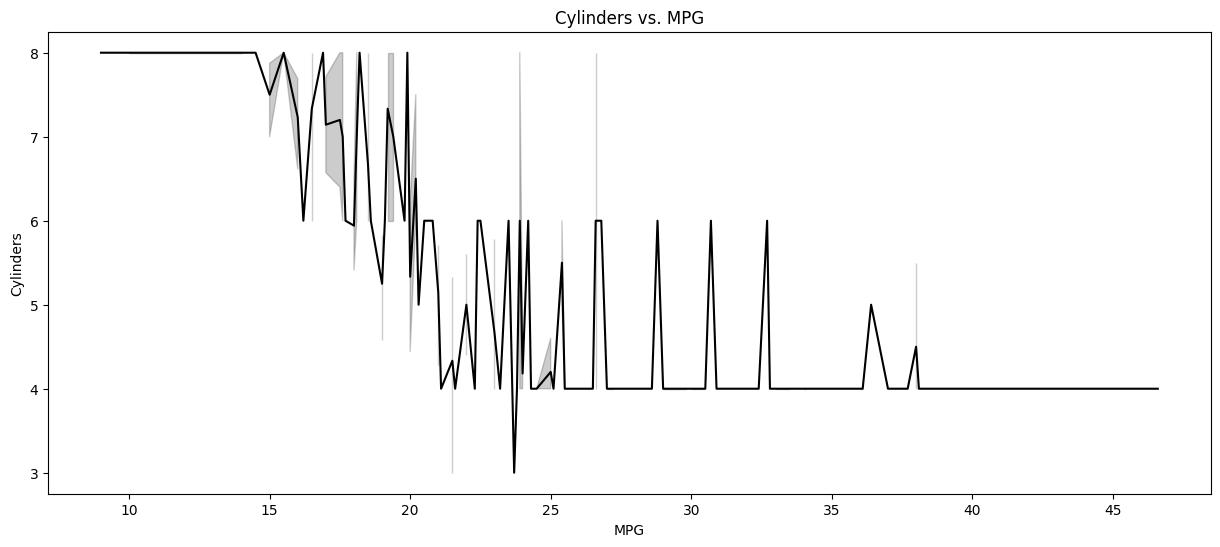

In [26]:
# Cylinders vs. MPG   
plt.figure(figsize=(15,6)) 

sns.lineplot(condensed, y= "cylinders", x ='mpg',color='black',legend=True)
plt.title("Cylinders vs. MPG")
plt.xlabel('MPG')   
plt.ylabel("Cylinders");            

